## Funciones

In [52]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import regex as re
# Funciones para extraer la información de los JSON

# Definir la función para obtener el texto de los hashtags
def get_hashtags_text(x):
    if pd.notna(x) and 'hashtags' in x and x['hashtags']:
        hashtags = x['hashtags']
        hashtags_text = [ht['text'] for ht in hashtags]
        return hashtags_text
    else:
        return None

def get_urls(x):
    if pd.notna(x) and 'urls' in x and x['urls']:
        return True
    return False


def get_user_location(x):
    if pd.notna(x) and 'location' in x:
        return x['location']
    else:
        return None
    


def load_json_old(file_path):
    """
    Carga un archivo JSON en un DataFrame de Pandas.

    Args:
        file_path (str): Ruta del archivo JSON.

    Returns:
        pandas.DataFrame: DataFrame con los datos del archivo JSON.
    """
    # Crear un nuevo DataFrame vacío
    df_new = pd.DataFrame()

    try:
        # Leer el archivo JSON línea por línea y cargar los datos en una lista
        datos_json = []
        with open(file_path, "r", encoding="utf-8") as f:
            for line in f:
                data = json.loads(line)
                if 'retweeted_status' in data and data['retweeted_status'] != None:
                    data = data['retweeted_status']
                datos_json.append(data)

        # Convertir la lista de datos en un DataFrame de Pandas
        df = pd.DataFrame(datos_json)

        # Actualizar las columnas del nuevo DataFrame con los datos válidos
        df_new['id'] = df['id']
        df_new['lang'] = df['lang']
        df_new['text'] = df['text']
        df_new['favorite_count'] = df['favorite_count']
        df_new['retweet_count'] = df['retweet_count']
        df_new['possibly_sensitive'] = df['possibly_sensitive']
        df_new['created_at'] = df['created_at']
        df_new['is_quote_status'] = df['is_quote_status']
        #df_new = df_new[df['retweeted_status'].isna()]
        df_new['entities_hashtags_text'] = df['entities'].apply(get_hashtags_text)
        df_new['entities_urls'] = df['entities'].apply(get_urls)
        df_new['user_location'] = df['user'].apply(get_user_location)

        # Manejar la excepción de KeyError para las columnas opcionales
        try:
            df_new['reply_count'] = df['reply_count']
            df_new['quote_count'] = df['quote_count']
        except KeyError as e:
            print(f'Una o más columnas no existen en el archivo JSON: {e}')

        # Eliminar las columnas "user" y "entities"
        #df_new.drop(['user', 'entities'], axis=1, inplace=True)

    except Exception as e:
        print(f'Se produjo una excepción: {e}')

    # Retornar el DataFrame resultante
    return df_new


def load_json(file_path):
    """
    Carga un archivo JSON en un DataFrame de Pandas.

    Args:
        file_path (str): Ruta del archivo JSON.

    Returns:
        pandas.DataFrame: DataFrame con los datos del archivo JSON.
    """
    try:
        # Leer el archivo JSON línea por línea y cargar los datos en una lista
        datos_json = []
        with open(file_path, "r", encoding="utf-8") as f:
            for line in f:
                data = json.loads(line)
                if 'retweeted_status' in data and data['retweeted_status'] != None:
                    data = data['retweeted_status']
                datos_json.append(data)

        # Convertir la lista de datos en un DataFrame de Pandas
        df = pd.DataFrame(datos_json)

        # Crear un nuevo DataFrame a partir de las columnas necesarias del DataFrame original
        df_new = df[['id', 'lang', 'text', 'favorite_count', 'retweet_count',
                     'possibly_sensitive', 'created_at', 'is_quote_status']]
        df_new['entities_hashtags_text'] = df['entities'].apply(get_hashtags_text)
        df_new['entities_urls'] = df['entities'].apply(get_urls)
        df_new['user_location'] = df['user'].apply(get_user_location)

        # Manejar la excepción de KeyError para las columnas opcionales
        try:
            df_new['reply_count'] = df['reply_count']
            df_new['quote_count'] = df['quote_count']
        except KeyError as e:
            print(f'Una o más columnas no existen en el archivo JSON: {e}')

        # Retornar el DataFrame resultante
        return df_new

    except Exception as e:
        print(f'Se produjo una excepción: {e}')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## MEXICO

In [53]:
maria_json = load_json('RDATA/CrisisMMD_v2.0/json/hurricane_maria_final_data.json')
maria_tsv = pd.read_table('RDATA/CrisisMMD_v2.0/annotations/hurricane_maria_final_data.tsv')

maria = pd.merge(maria_json, maria_tsv[['tweet_id', 'text_info', 'text_info_conf', 'text_human', 'text_human_conf']],
                    left_on='id', right_on='tweet_id', how='left')
maria.drop('tweet_id',axis=1,inplace=True)

C:\Users\steve\AppData\Local\Temp\ipykernel_13560\4197445580.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['entities_hashtags_text'] = df['entities'].apply(get_hashtags_text)
C:\Users\steve\AppData\Local\Temp\ipykernel_13560\4197445580.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['entities_urls'] = df['entities'].apply(get_urls)
C:\Users\steve\AppData\Local\Temp\ipykernel_13560\4197445580.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [54]:
# Creamos el nuevo df con los datos mezclados
mexico_json = load_json('RDATA/CrisisMMD_v2.0/json/mexico_earthquake_final_data.json')
mexico_tsv = pd.read_table('RDATA/CrisisMMD_v2.0/annotations/mexico_earthquake_final_data.tsv')

mexico = pd.merge(mexico_json, mexico_tsv[['tweet_id', 'text_info', 'text_info_conf', 'text_human', 'text_human_conf']],
                    left_on='id', right_on='tweet_id', how='left')
mexico.drop('tweet_id',axis=1,inplace=True)





C:\Users\steve\AppData\Local\Temp\ipykernel_13560\4197445580.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['entities_hashtags_text'] = df['entities'].apply(get_hashtags_text)
C:\Users\steve\AppData\Local\Temp\ipykernel_13560\4197445580.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['entities_urls'] = df['entities'].apply(get_urls)
C:\Users\steve\AppData\Local\Temp\ipykernel_13560\4197445580.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [55]:
import matplotlib.pyplot as plt
def hist_interaction(df):
    print(df[['quote_count', 'favorite_count', 'reply_count', 'retweet_count']].describe())
    new_df = df[df['retweet_count'] > 50]
    new_df[['quote_count', 'favorite_count', 'reply_count', 'retweet_count']].hist()



def info_and_human(df):
    
    #se copia la dataframe
    df_info = df.copy()
    df_human = df.copy()

    #se borran los archivos NaN correspondientes
    df_info = df_info[df_info['text_info'].notna()]
    df_info = df_info[df_info['text_info_conf'].notna()]
    df_human = df_human[df_human['text_human'].notna()]
    df_human = df_human[df_human['text_human_conf'].notna()]

    #se reinicia la index si necesario
    df_info.reset_index(inplace=True, drop=True)
    df_human.reset_index(inplace=True, drop=True)

    #se crea nueva id según index
    df_info["new_id"] = df_info.index
    df_human["new_id"] = df_human.index

    
    #se crean dataframes para separar conf=1 con conf<1
    info_confiable = df_info[["new_id", "id", "text_info", "text_info_conf"]].copy()
    info_casi_confiable = df_info[["new_id", "id", "text_info", "text_info_conf"]].copy()

    wanted = []
    not_wanted = []

    i = 0
    while i < info_confiable.shape[0]:
        #print(info_confiable["text_info_conf"][i])
        if info_confiable["text_info_conf"][i] < 1:
            not_wanted.append(info_confiable["new_id"][i])
        else:
            wanted.append(info_confiable["new_id"][i])
        i += 1


    for j in not_wanted:
        info_confiable = info_confiable.drop(info_confiable[info_confiable["new_id"]==j].index)

    for k in wanted:
        info_casi_confiable = info_casi_confiable.drop(info_casi_confiable[info_casi_confiable["new_id"]==k].index)


    #se crean dataframes para separar conf=1 con conf<1
    human_confiable = df_human[["new_id", "id", "text_human", "text_human_conf"]].copy()
    human_casi_confiable = df_human[["new_id", "id", "text_human", "text_human_conf"]].copy()

    hwanted = []
    not_hwanted = []

    i = 0
    while i < human_confiable.shape[0]:
        #print(info_confiable["text_info_conf"][i])
        if human_confiable["text_human_conf"][i] < 1:
            not_hwanted.append(human_confiable["new_id"][i])
        else:
            hwanted.append(human_confiable["new_id"][i])
        i += 1


    for j in not_hwanted:
        human_confiable = human_confiable.drop(human_confiable[human_confiable["new_id"]==j].index)

    for k in hwanted:
        human_casi_confiable = human_casi_confiable.drop(human_casi_confiable[human_casi_confiable["new_id"]==k].index)


    valores_info_confiable = info_confiable["text_info"].value_counts()

    plt.bar(valores_info_confiable.index, valores_info_confiable.values)

    plt.xlabel("")
    plt.ylabel("")
    plt.title("")

    plt.show()

    valores_human_confiable = human_confiable["text_human"].value_counts()

    plt.bar(valores_human_confiable.index, valores_human_confiable.values)

    for i, v in enumerate(valores_human_confiable.values):
        plt.text(i, v + 1, str(v), ha="center")

    plt.xlabel("")
    plt.ylabel("")
    plt.title("")

    plt.xticks(rotation=90)

    plt.show()


    # calculate counts and means
    counts = info_casi_confiable['text_info'].value_counts().sort_index()
    means = info_casi_confiable.groupby('text_info')['text_info_conf'].mean().sort_index()

    # plot the bar chart
    fig, ax = plt.subplots(figsize=(8,6))
    counts.plot(kind='bar', color='blue', width=0.4, position=0, ax=ax)
    means.plot(kind='bar', color='red', width=0.4, position=1, ax=ax)

    # add labels
    ax.set_xlabel('Categorical Value')
    ax.set_ylabel('Count / Mean Reliability')
    ax.set_title('Count and Mean Reliability by Categorical Value')

    # add value labels
    for i, count in enumerate(counts):
        ax.text(i-0.2, count+0.1, str(count), color='black', fontweight='bold')
    for i, mean in enumerate(means):
        ax.text(i+0.2, mean+0.02, f'{mean:.2f}', color='black', ha='center')

    # calculate counts and means
    counts = human_casi_confiable['text_human'].value_counts().sort_index()
    means = human_casi_confiable.groupby('text_human')['text_human_conf'].mean().sort_index()

    # plot the bar chart
    fig, ax = plt.subplots(figsize=(8,6))
    counts.plot(kind='bar', color='blue', width=0.4, position=0, ax=ax)
    means.plot(kind='bar', color='red', width=0.4, position=1, ax=ax)

    # add labels
    ax.set_xlabel('Categorical Value')
    ax.set_ylabel('Count / Mean Reliability')
    ax.set_title('Count and Mean Reliability by Categorical Value')

    # add value labels
    for i, count in enumerate(counts):
        ax.text(i-0.2, count+0.1, str(count), color='black', fontweight='bold')
    for i, mean in enumerate(means):
        ax.text(i+0.2, mean+0.02, f'{mean:.2f}', color='black', ha='center')

    
def count_booleans(df):
    valores_T = 0
    valores_F = 0
    quoteable = 0
    not_quotable = 0
    url = 0
    urlnt = 0

    for i in range(df.shape[0]):
        if df["possibly_sensitive"][i]:
            valores_T +=1
        else:
            valores_F +=1

        if df["is_quote_status"][i]:
            quoteable += 1
        else:
            not_quotable += 1        

        if df["entities_urls"][i]:
            url += 1
        else:
            urlnt += 1

    plt.bar(["Posible Sensitivo","Posible no Sensitivo"],[valores_T, valores_F])
    plt.show()

    plt.bar(["Es Quote","No Es Quote"],[quoteable, not_quotable])
    plt.show()

    plt.bar(["Url Anexado","Url no Anexado"],[url, urlnt])
    plt.show()


In [58]:
def count_words(L, n):
    words = []
    for text in list(L): 
        for word in str(text).split():
            #Aca se filtran las palabras que se repiten con mayusculas
            wl = re.sub(r'[\W_]+', '', word.lower())
            # california. -> california
            if word in ['US','USA', 'usa', 'Usa']:
                words.append('USA')
            
            elif wl == "":   
                pass
        
            elif word.lower()[:-2] == "'s":
                words.append(wl[0:-1])

            elif word.lower() != wl:
                words.append(wl)
    
            else:
                words.append(word.lower())

    counter_words = Counter(words)
    pairs = counter_words.most_common(n)
    return pairs

def filter_count_words(L,n):
    stop_words = set(stopwords.words('english'))
    stop_words.add('-')
    stop_words.add('&amp;')
    stop_words.add('|')
    a=count_words(L,n)
    filtered = []
    for word in range(len(a)-1):
        if a[word][0].lower() not in stop_words:
            filtered.append(a[word])
    return filtered

def graficar_palabras(pares):
    words = [par[0] for par in pares]
    frequencies = [par[1] for par in pares]
    
    fig, ax = plt.subplots()

    ax.bar(words, frequencies)
    ax.set_xlabel('Palabras')
    ax.set_ylabel('Frecuencia')
    ax.set_title('Frecuencia de palabras')
    ax.legend(['Frecuencia'])    
    ax.tick_params(axis='x', labelrotation=90)  
    fig.set_size_inches(15, 6)
    plt.show()




       quote_count  favorite_count  reply_count  retweet_count
count  1337.000000     1337.000000  1336.000000    1337.000000
mean      1.026178       19.960359     0.547156      12.545999
std      12.108173      224.663003     4.187643     159.094056
min       0.000000        0.000000     0.000000       0.000000
25%       0.000000        0.000000     0.000000       0.000000
50%       0.000000        0.000000     0.000000       0.000000
75%       0.000000        0.000000     0.000000       0.000000
max     358.000000     6090.000000    71.000000    5149.000000


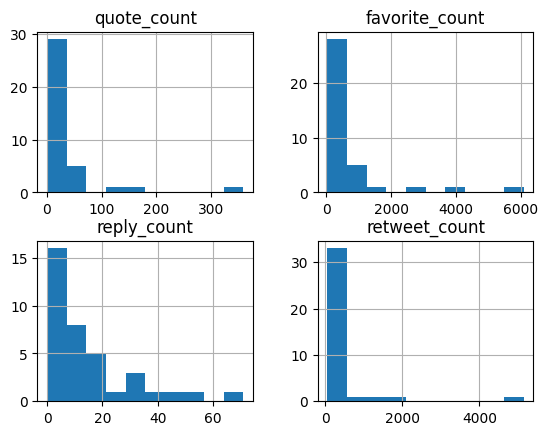

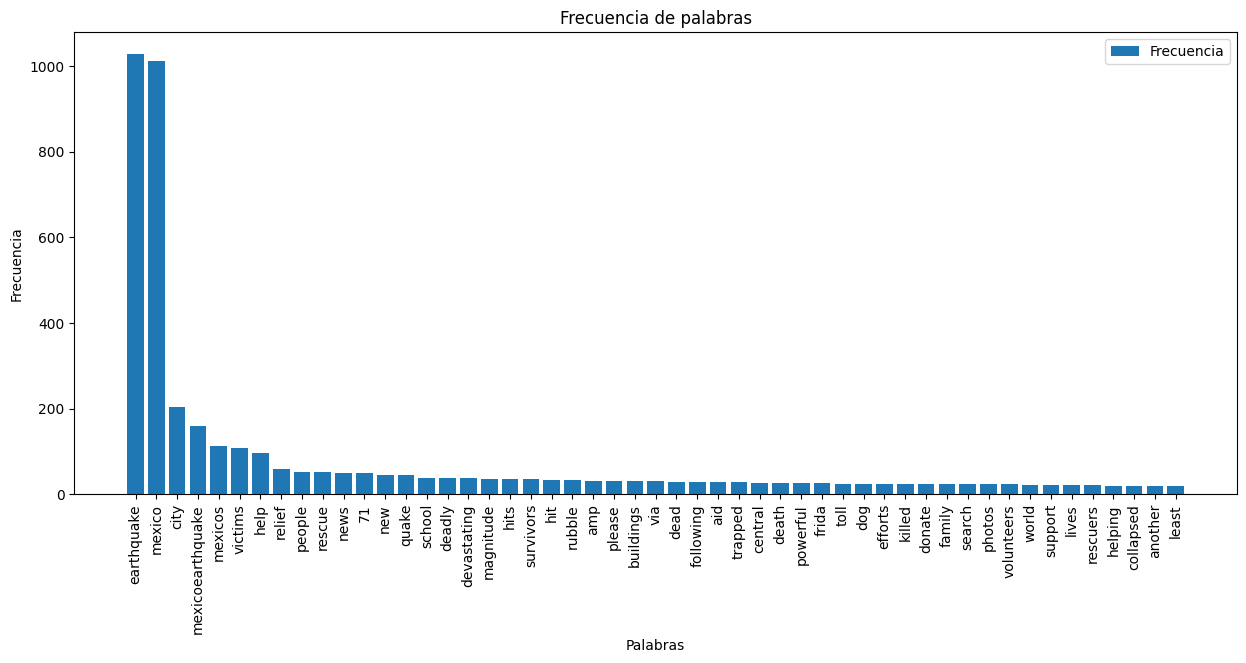

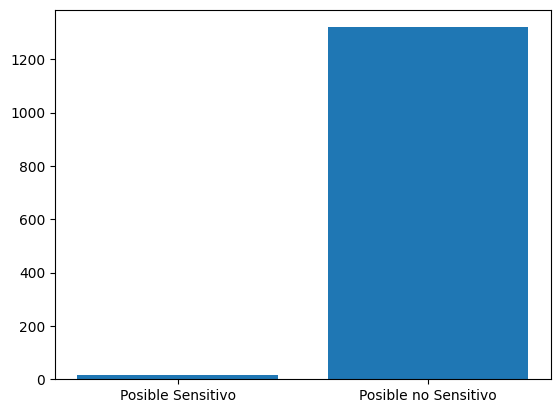

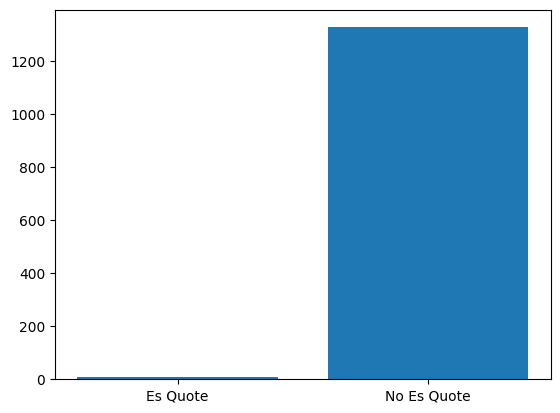

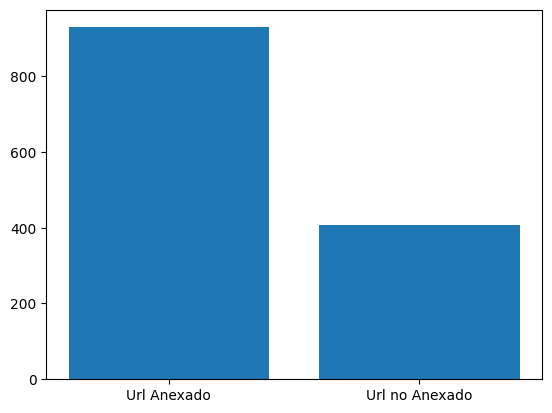

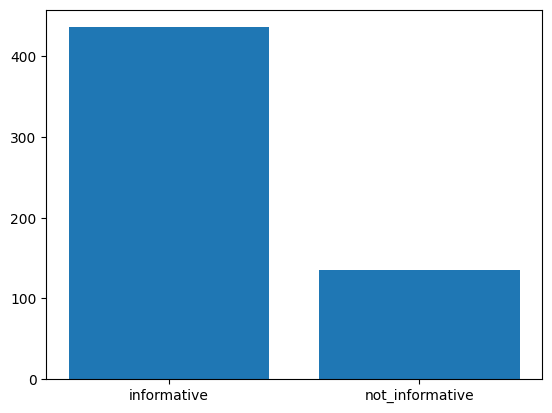

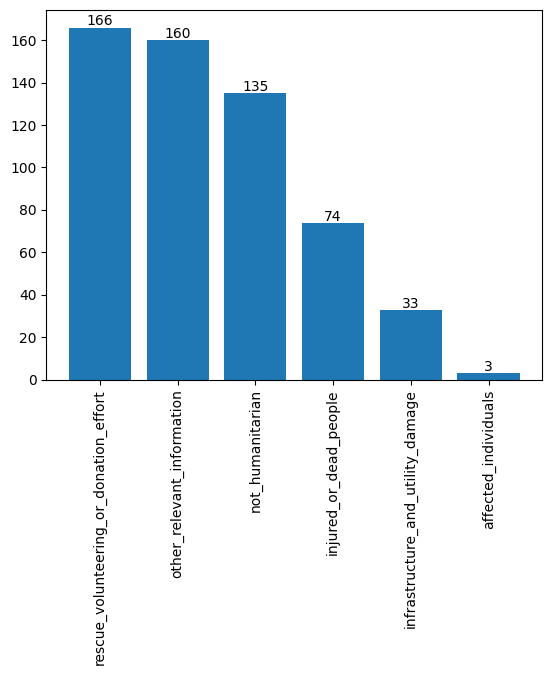

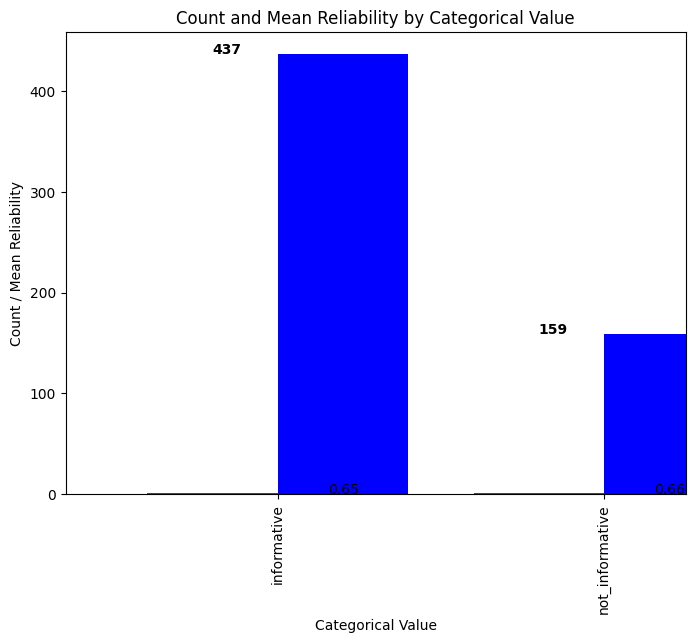

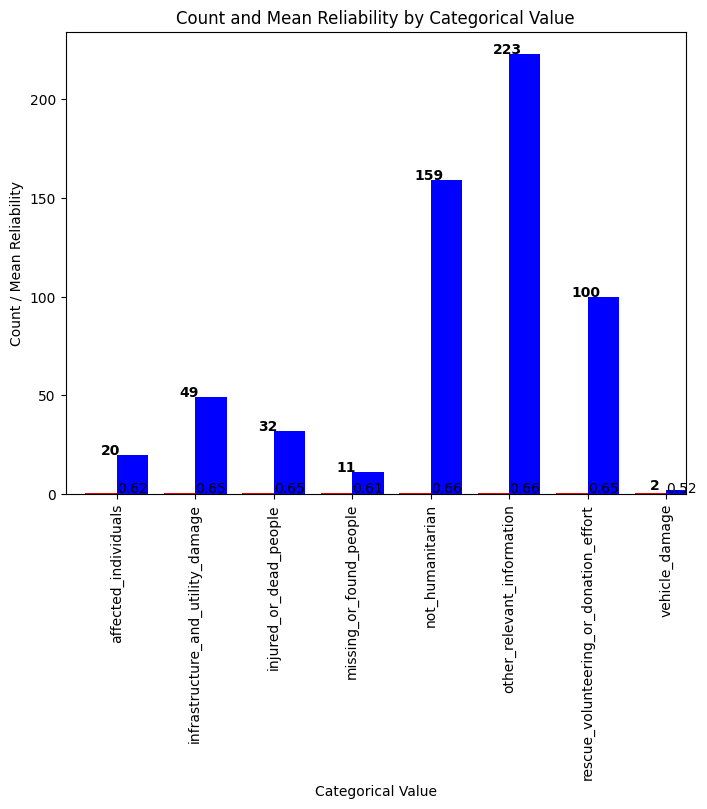

In [60]:
hist_interaction(mexico)

#words(mexico)
graficar_palabras(filter_count_words(mexico['text'], 90))
count_booleans(mexico)
info_and_human(mexico)

       quote_count  favorite_count  reply_count  retweet_count
count  4423.000000     4423.000000  4423.000000    4423.000000
mean      1.497174       26.034140     1.280353      14.627628
std      38.814015      813.235117    27.202219     559.207515
min       0.000000        0.000000     0.000000       0.000000
25%       0.000000        0.000000     0.000000       0.000000
50%       0.000000        0.000000     0.000000       0.000000
75%       0.000000        0.000000     0.000000       0.000000
max    1984.000000    51726.000000  1514.000000   36840.000000


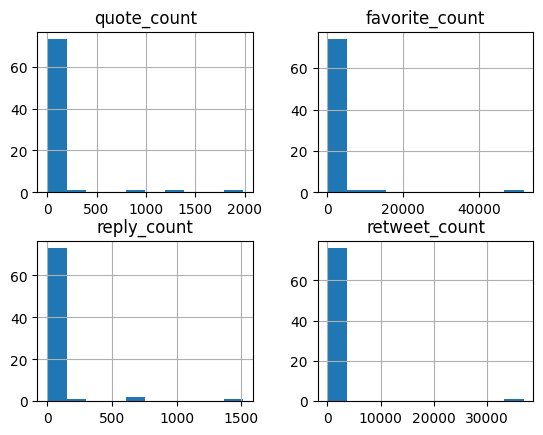

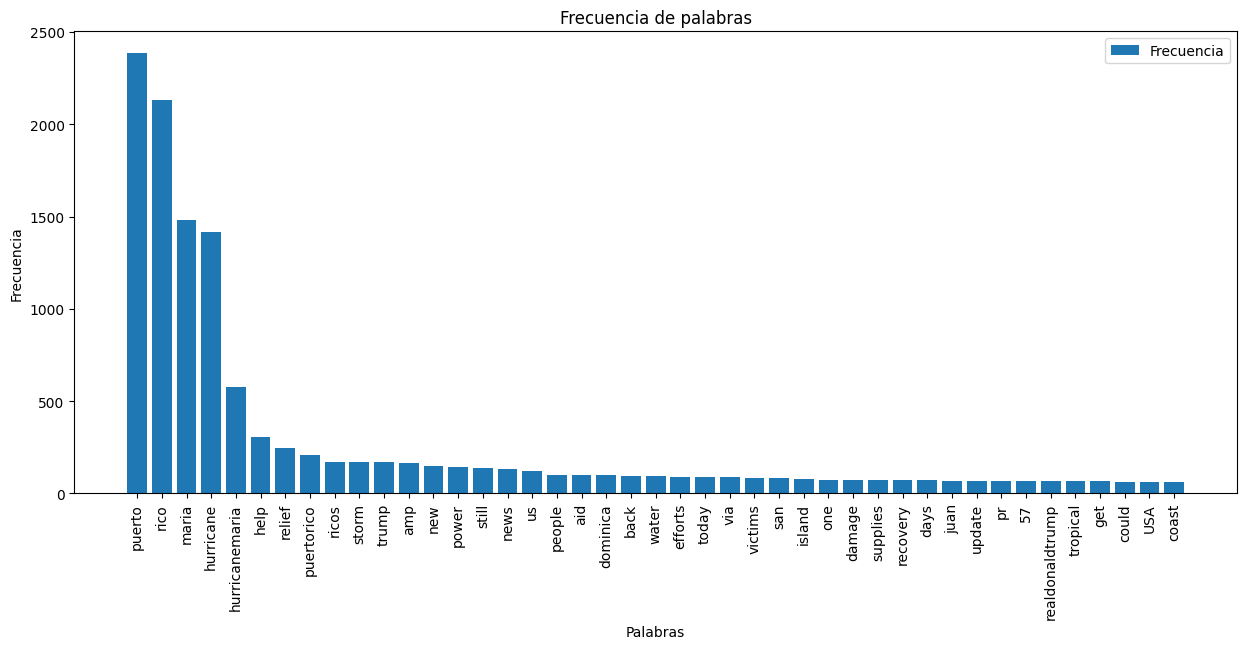

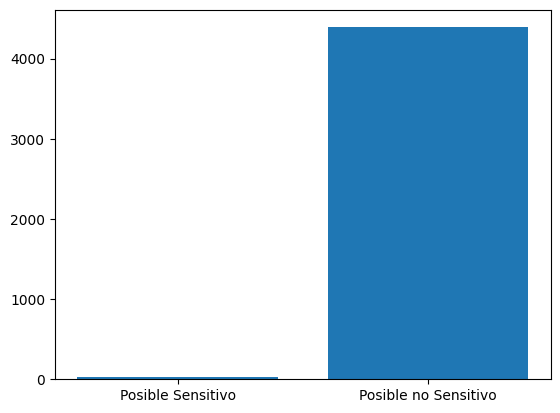

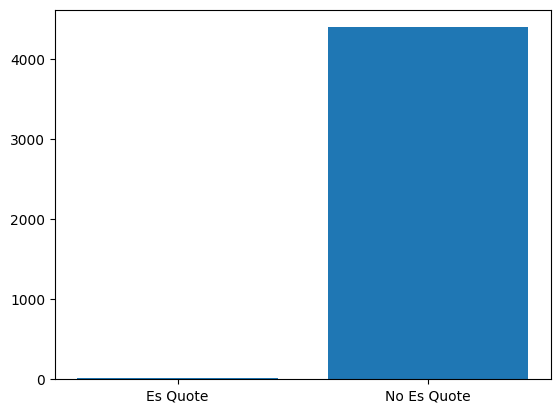

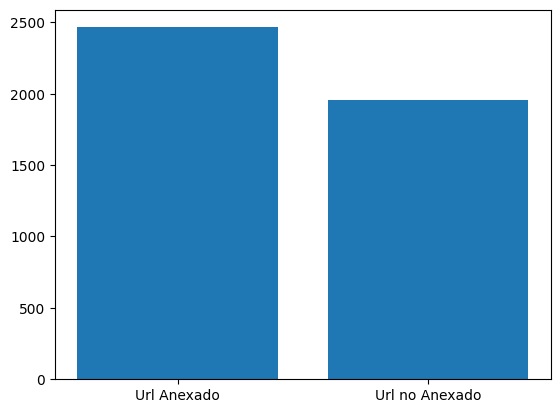

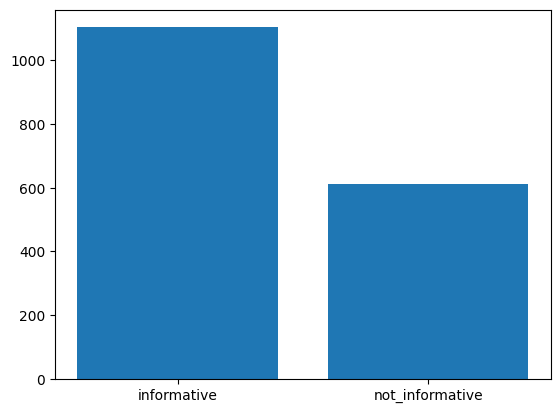

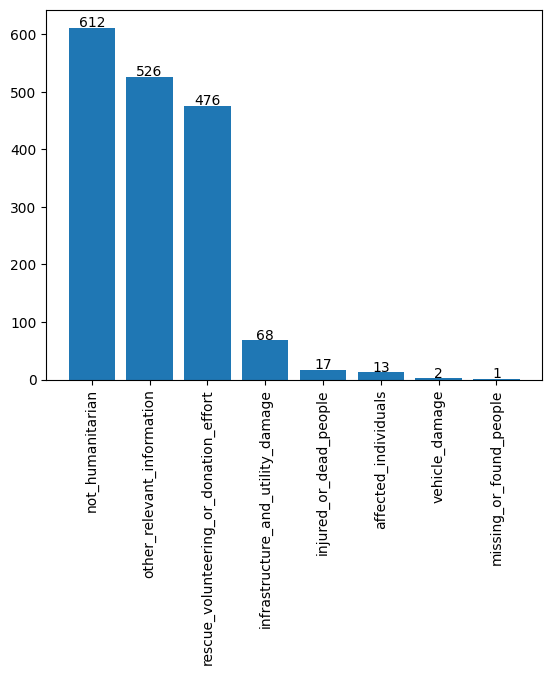

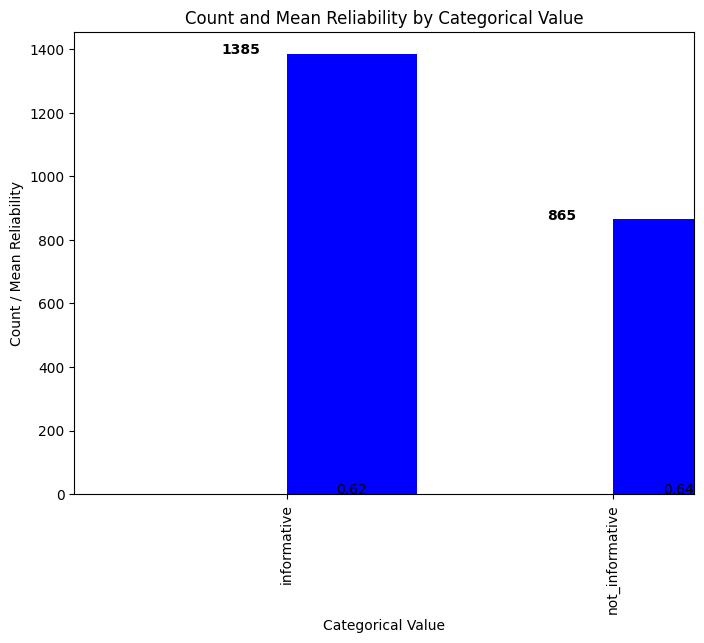

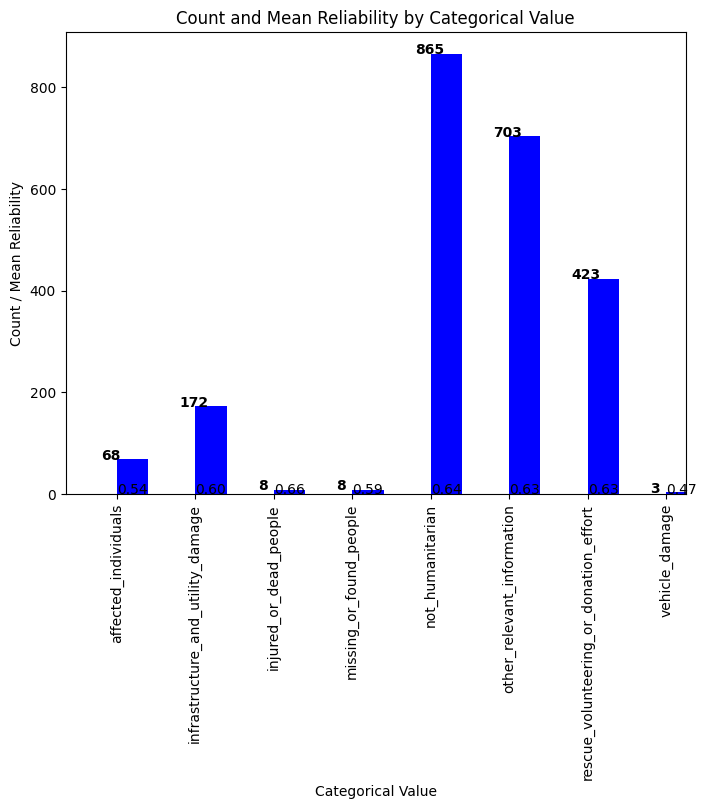

In [61]:
hist_interaction(maria)

#words(maria)
graficar_palabras(filter_count_words(maria['text'],90))
count_booleans(maria)
info_and_human(maria)